<a href="https://colab.research.google.com/github/HananMoAlnakhal/PPV/blob/main/ML_RegHW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hanan Mo. Alnakhal**
- student_id :220220202
- started on 20/Jan/2025 10:02pm
- done on 21/Jan/2025 6:47pm

# ***Steps:***


### 1. Installing +importing libraries
`!pip install pycaret[full]`
```python
import pandas as pd
import pycaret
from pycaret.regression import *
```
### 2. imported the data using the url
### 3. splited data into seen and unseen
> used ->90%(will be used in ) to unused ->10%

> splitted the data after shuffling it because I noticed that the first half of the data are Male and the other half are Female and if we split it as it is it will be biased becouse it will be trained mostly on males
### 4. used the seen data in the setup
### 5. then used `exp.compare_models(sort='RMSE')` to get the best models
### 6. based on the results chosed ***lightgbm Light Gradient Boosting Machine***
### 7. made the model using this code `lightgbm = ex### p.create_model('lightgbm', fold=5)`
### 8. made essinital plots
### 9. saw the tuned model (the tuned model turned out to be worse btw)
### 10. tested the model and compared between the `PPV` and	`prediction_label`
  they are so close!
### 11. finalized the model
### 12. tested the model on unseen data! (the 10%)

### 13. saved the model as PPV.pkl

# **Installing requirments**

In [ ]:
!pip install pycaret[full]

In [3]:
import pandas as pd

In [4]:
import pycaret
from pycaret.regression import *
pycaret.__version__

'3.3.2'

# **importing data**

In [20]:
url = 'https://docs.google.com/spreadsheets/d/1LWurKSC0UOMrv_AdmCaIHZllNll__HU13oFJsm0_siY/export?format=csv'
df = pd.read_csv(url)

In [21]:
df.head()

,Gender,Age,Dur,PPV
0,Male,0,20,15.198437
1,Male,0,21,15.741015
2,Male,0,22,16.267189
3,Male,0,23,16.777448
4,Male,0,24,17.272269


In [23]:
df.shape

(5270, 4)

# splitting the data
using setup()

## splitting into seen and unseen data

I want to really test my model using data that it has never seen before

- so `data_unseen` will not be used untill the end

In [28]:
data = df.sample(frac=0.9, random_state=555)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

In [37]:
print("the data that will enter the trainig",data.shape[0])
print("the data that will not enter the trainig",data_unseen.shape[0])

the data that will enter the trainig 4743
the data that will not enter the trainig 527


In [39]:
data['Gender'].value_counts()

,count
Gender,
Male,2372
Female,2371


# using pycaret `setup`
<h1 id="using-pycaret-`setup`"></h1>

In [103]:
exp = RegressionExperiment()
exp.setup(data, target = 'PPV', session_id = 123,ordinal_features=None,preprocess=False)
best = exp.compare_models(sort='RMSE')

,Description,Value
0,Session id,123
1,Target,PPV
2,Target type,Regression
3,Original data shape,"(4743, 4)"
4,Transformed data shape,"(4743, 4)"
5,Transformed train set shape,"(3320, 4)"
6,Transformed test set shape,"(1423, 4)"
7,Numeric features,2
8,Categorical features,1


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.0374,0.0053,0.0725,0.9999,0.0052,0.0030,0.4750
dummy,Dummy Regressor,6.0514,49.8493,7.0590,-0.0022,0.6429,1.0600,0.0140


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

# my choice: lightgbm **Light Gradient Boosting Machine**
- has the lowest error and the highiest R^2,regardless of the training time is quite high

# **creating the model**
- used fold=5 to reduce the re=isk of OVERFITTING

In [86]:
lightgbm = exp.create_model('lightgbm', fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0433,0.0072,0.0848,0.9999,0.0056,0.0033
1,0.0412,0.0068,0.0822,0.9999,0.0058,0.0032
2,0.0366,0.0049,0.0700,0.9999,0.0047,0.0028
3,0.0404,0.0062,0.0790,0.9999,0.0057,0.0033
4,0.0387,0.0059,0.0766,0.9999,0.0057,0.0032
Mean,0.0400,0.0062,0.0785,0.9999,0.0055,0.0032
Std,0.0023,0.0008,0.0051,0.0000,0.0004,0.0002


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# plotting residuals

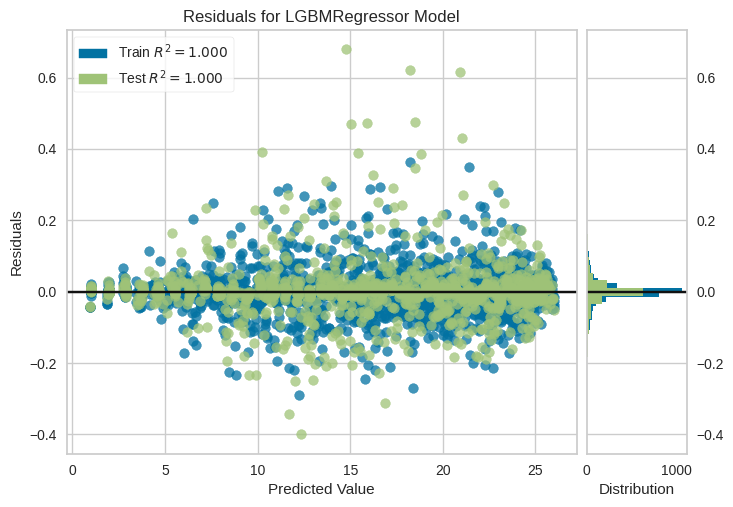

In [87]:
exp.plot_model(lightgbm, plot = 'residuals')

# see ERROR

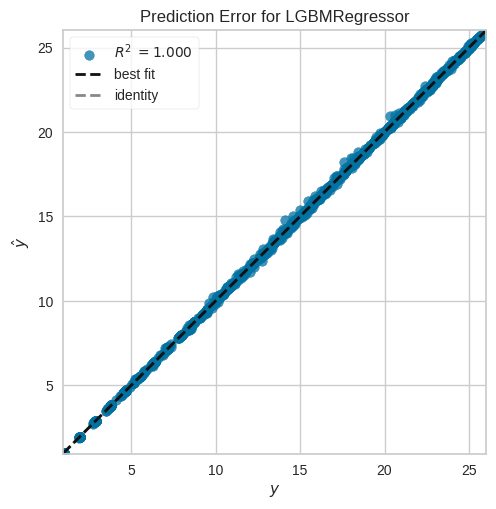

In [88]:
exp.plot_model(lightgbm, plot = 'error')

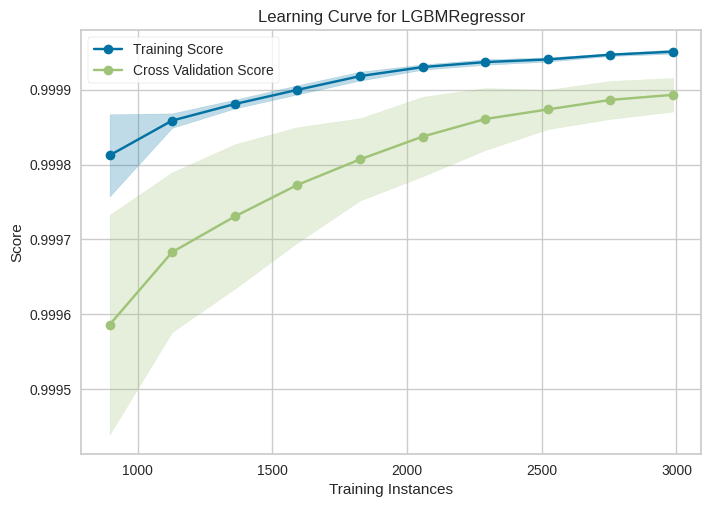

In [89]:
exp.plot_model(lightgbm, plot = 'learning')

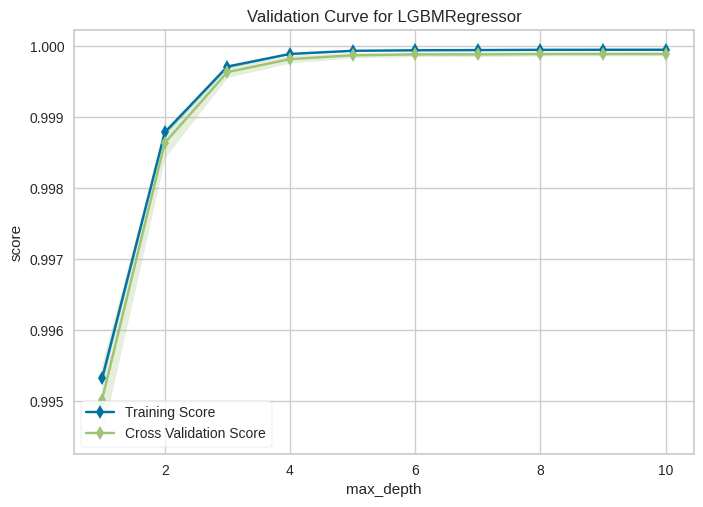

In [90]:
exp.plot_model(lightgbm, plot = 'vc')

# best features

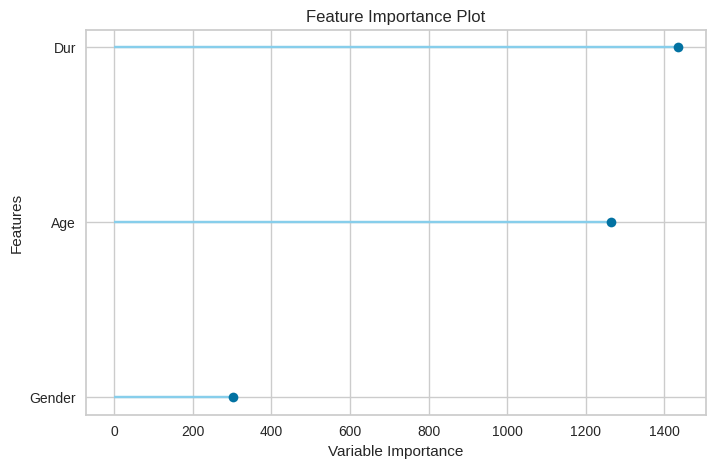

In [68]:
exp.plot_model(lightgbm, plot = 'feature')

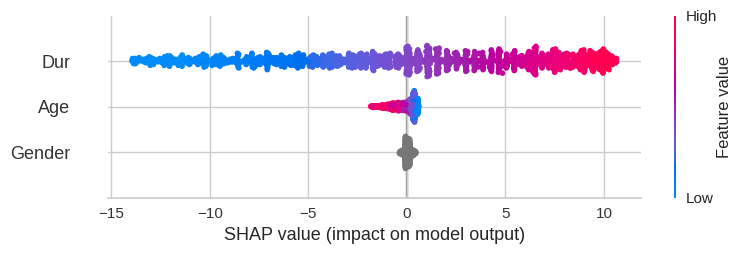

In [66]:
exp.interpret_model(lightgbm, plot = 'summary')

In [67]:
exp.interpret_model(lightgbm, plot = 'reason', observation = 2)

# tuned model
the original model turned out to be better than the tuned one!!  :)

In [91]:
tune_lightgbm = exp.tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1798,0.0688,0.2622,0.9986,0.0603,0.0385
1,0.1807,0.0699,0.2644,0.9986,0.0587,0.0335
2,0.1715,0.0602,0.2453,0.9987,0.0455,0.0273
3,0.1492,0.0469,0.2167,0.9990,0.0371,0.0232
4,0.1653,0.0596,0.2441,0.9988,0.0517,0.0303
5,0.1740,0.0653,0.2555,0.9988,0.0632,0.0371
6,0.1837,0.0745,0.2729,0.9985,0.0745,0.0482
7,0.1680,0.0652,0.2553,0.9987,0.0515,0.0316
8,0.1722,0.0551,0.2347,0.9989,0.0471,0.0285


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# **the model result**

In [70]:
holdout_pred = exp.predict_model(lightgbm)
holdout_pred.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0374,0.0057,0.0752,0.9999,0.0051,0.0029


,Gender,Age,Dur,PPV,prediction_label
2976,Female,40,4,3.820880,3.826051
696,Male,1,35,21.815239,21.812535
996,Female,52,5,4.679705,4.671349
4469,Male,46,17,12.891843,12.773545
658,Male,28,40,22.617270,22.547133


# finalizing model
training the model on all of the data
- the unseen data still didn't enter the model

In [80]:
final = exp.finalize_model(lightgbm)

In [81]:
final

Pipeline(memory=Memory(location=None),
         steps=[('placeholder', None),
                ('actual_estimator',
                 LGBMRegressor(n_jobs=-1, random_state=123))])

# testing the model using **unseen data**

In [85]:
unseen_predictions = exp.predict_model(final, data=data_unseen)
unseen_predictions.tail()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0297,0.0034,0.0583,0.9999,0.0041,0.0023


,Gender,Age,Dur,PPV,prediction_label
522,Female,73,1,1.000000,1.015428
523,Female,75,2,1.936786,1.928688
524,Female,75,5,4.376004,4.333830
525,Female,76,3,2.800929,2.797953
526,Female,80,1,1.000000,1.003416


In [102]:
new_data = pd.DataFrame({'Gender': ['Female'], 'Age': [20], 'Dur': [5]})

exp.predict_model(final, data=new_data)

,Gender,Age,Dur,prediction_label
0,Female,20,5,4.701977


# Saving the model

In [82]:
exp.save_model(final, 'PPV')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('placeholder', None),
                 ('actual_estimator',
                  LGBMRegressor(n_jobs=-1, random_state=123))]),
 'PPV.pkl')

In [83]:
loaded_from_disk = load_model('PPV')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=Memory(location=None),
         steps=[('placeholder', None),
                ('actual_estimator',
                 LGBMRegressor(n_jobs=-1, random_state=123))])

# the end of the project